# Baby Names

*  Giulia MANNAIOLI
*  Lais Isabelle ALVES DOS SANTOS
*  Pedro ANDRADE FERREIRA SOBRINHO
*  Rafael SENNA BENATTI


### Import libraries

In [3]:
import altair as alt
import pandas as pd

alt.data_transformers.enable('json') # work-around to let Altair handle larger data sets

DataTransformerRegistry.enable('json')

### Data Loading

In [4]:
# Detect if using colab
if 'google.colab' in str(get_ipython()):
    colab = True
else:
    colab = False

if colab:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

    path = '/content/drive/MyDrive/IGRMiniProject/baby_names_visualization/'
else:
    path = './'

In [5]:
# Reference to data
baby_names = pd.read_csv(path + 'dpt2020.csv', delimiter=';')

# Pre-process data set
baby_names = baby_names[baby_names.annais != 'XXXX']
baby_names = baby_names[baby_names.dpt != 'XX']

# show data
baby_names

,sexe,preusuel,annais,dpt,nombre
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3727545,2,ZYA,2013,44,4
3727546,2,ZYA,2013,59,3
3727547,2,ZYA,2017,974,3
3727548,2,ZYA,2018,59,3


### Visualization 1

How do baby names evolve over time? Are there names that have consistently remained popular or unpopular? Are there some that have were suddenly or briefly popular or unpopular? Are there trends in time?

In [6]:
# New data frame for visualization 1
baby_names_vis1 = baby_names
baby_names_vis1

,sexe,preusuel,annais,dpt,nombre
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3727545,2,ZYA,2013,44,4
3727546,2,ZYA,2013,59,3
3727547,2,ZYA,2017,974,3
3727548,2,ZYA,2018,59,3


In [7]:
def print_full_rows(x):
    """
    Print full rows of a dataset
    """
    pd.set_option('display.max_rows', None)
    print(x)
    pd.reset_option('display.max_rows')

In [8]:
# Sum the number of babies within the name and the year
n_names = baby_names_vis1.groupby(['annais', 'preusuel'])['nombre'].sum().reset_index()

# Create new dataframe with this data
new_baby_names_vis1 = pd.DataFrame({
    'names': n_names['preusuel'],
    'year': n_names['annais'],
    'number': n_names['nombre']
})

In [9]:
# Create visualization 1 with all the name
vis1 = alt.Chart(new_baby_names_vis1).mark_line().encode(
    x='year:T',         # encode the year as 'x' and time
    y='number:Q',       # encode the number of babies as 'y' and quantity
    color='names:N'     # encode the name as the color of the line
).properties(           
    # Change the size of the chart
    width=1000,
    height=500
)

vis1

alt.Chart(...)

Display random 3 names

In [12]:
# Choose three random names from the DataFrame
random_names = new_baby_names_vis1['names'].sample(n=10)
filtered_vis1 = new_baby_names_vis1[new_baby_names_vis1['names'].isin(random_names)]

In [13]:
# Call visualization
vis1 = alt.Chart(filtered_vis1).mark_line().encode(
    x='year:T',         # encode the year as 'x' and time
    y='number:Q',       # encode the number of babies as 'y' and quantity
    color='names:N'     # encode the name as the color of the line
).properties(           
    # Change the size of the chart
    width=1000,
    height=500
)

vis1

alt.Chart(...)

### Visualization 2

Is there a regional effect in the data? Are some names more popular in some regions? Are popular names generally popular across the whole country?

In [14]:
import pandas as pd
import plotly.express as px

df_cleaned = baby_names.dropna(subset=['preusuel'])
selected_rows = df_cleaned[df_cleaned['preusuel'].str.contains('BRUNO')]
department_counts = selected_rows.groupby('dpt')['nombre'].sum().reset_index()

# Create a treemap using plotly
fig = px.treemap(department_counts, path=['dpt'], values='nombre')
fig.update_layout(title='Occurrences of Bruno by Department')
# Display the treemap
fig.show()

AttributeError: module 'plotly.validators.layout.template' has no attribute 'LayoutValidator'

### Visualization 3

Are there gender effects in the data? Does popularity of names given to both sexes evolve consistently?

In [18]:
import pandas as pd
import altair as alt

df_cleaned = baby_names.dropna(subset=['preusuel'])
name_year_counts = df_cleaned.groupby(['preusuel', 'annais'])['nombre'].sum().reset_index()

# Exclude names with preusuel = "_PRENOMS_RARES"
name_year_counts = name_year_counts[name_year_counts['preusuel'] != "_PRENOMS_RARES"]

# Filter for names for both sexes
name_counts = df_cleaned.groupby('preusuel')['sexe'].unique().reset_index()
filtered_names = name_counts[name_counts['sexe'].apply(lambda x: set(x) == {1, 2})]['preusuel']

# Sort by 'annais' (because if not the heatmap goes from 1962 to 2020 and then from 1904 to 1984)
name_year_counts_filtered = name_year_counts.sort_values('annais')

# Calculate the minimum and maximum popularity to set the colorscale
min_popularity = name_year_counts['nombre'].min()
max_popularity = name_year_counts['nombre'].max()

print("Minimum Popularity:", min_popularity)
print("Maximum Popularity:", max_popularity)


Minimum Popularity: 3
Maximum Popularity: 53596


In [25]:
import pandas as pd
import altair as alt
import numpy as np

colorscales = [
    [0.0, int("440154", 16)],
    [0.03, int("482374", 16)],
    [0.07, int("403887", 16)],
    [0.1, int("348094", 16)],
    [0.13, int("5A74A0", 16)],
    [0.17, int("8CB05F", 16)],
    [0.2, int("B3E246", 16)],
    [0.23, int("D9F43C", 16)],
    [0.27, int("FDE725", 16)],
    [0.3, int("EEA01E", 16)],
    [1.0, int("D7191C", 16)]
]

# Define the logarithmic range of values
zmin = 3
zmax = 50000
z_range = np.logspace(np.log10(zmin), np.log10(zmax), len(colorscales)-1)


# Create the brush selection
brush = alt.selection_interval(encodings=['x', 'y'])


# Create the heatmap using Altair
heatmap = alt.Chart(name_year_counts_filtered).mark_rect().encode(
    x='annais:O',
    y='preusuel:O',
    color=alt.Color('nombre:Q', scale=alt.Scale(type='log', domain=[zmin, zmax], scheme='viridis')),
    tooltip=['annais:O', 'preusuel:O', 'nombre:Q']
).properties(
    title='Popularity of Baby Neutral-Names Over Time',
    width=1200,
    height=800
).add_selection(brush)

# Create the filtered heatmap based on the brush selection
filtered_heatmap = alt.Chart(name_year_counts_filtered).mark_rect().encode(
    x='annais:O',
    y='preusuel:O',
    color=alt.Color('nombre:Q', scale=alt.Scale(type='linear', domain=[zmin, zmax], range=colorscales)),
    tooltip=['annais:O', 'preusuel:O', 'nombre:Q']
).properties(
    title='Selected Popularity of Baby Neutral-Names Over Time',
    width=1000,
    height=700
).transform_filter(brush)

# Display both heatmaps together
heatmap & filtered_heatmap


alt.VConcatChart(...)

- In an attempt to address the issue of color gradient, I made modifications to the colorscale used in the heatmap. Previously, the colorscale was dominated by shades of purple, making it difficult to distinguish variations in popularity for names with counts less then 10,000. To enhance the visual representation, I expanded the colorscale to include a wider range of colors for counts up to 15,000, and reduced the number of colors used for counts above that threshold.
This was the result with viridis from 0 to 50k:

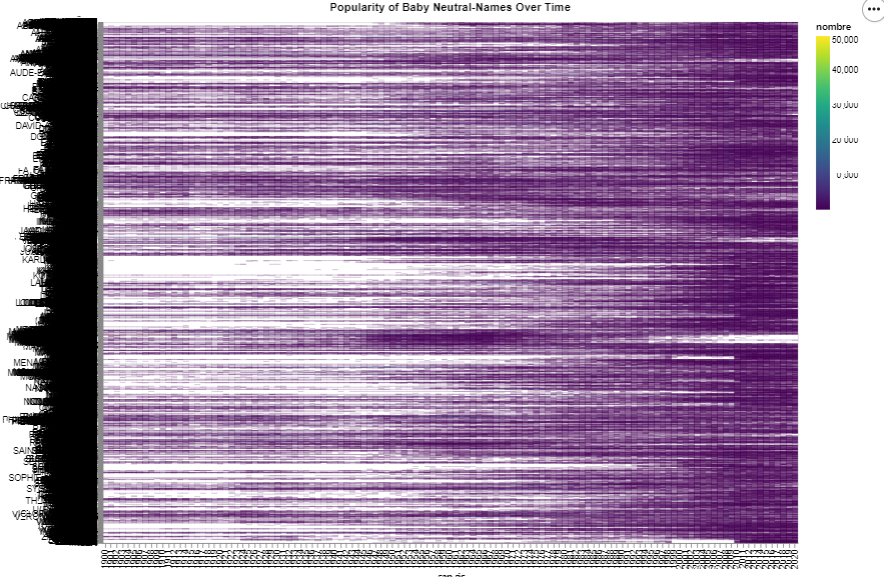


- To navigate the heatmap effectively, it is recommended to use the selector and select a smaller part of the map. This allows for a better view and legibility of all the names displayed. In that way, users can explore the heatmap in detail and observe the changing popularity of names over time.


### Comments

We choose to implement the heatmap because this visualization effectively showcases the evolution of baby neutral-names over time.
Compared to other visualizations, such as line charts or bar graphs, the heatmap has distinct advantages. It excels in showcasing the complete picture without overlapping lines, ensuring that each name's popularity is clearly visible and discernible. By utilizing varying colors, the heatmap not only presents the popularity of each name but also enables easy identification and understanding of the trends. This makes it an ideal choice for analyzing the evolution of baby neutral-names, as it provides a comprehensive and visually appealing representation of the data.
Anyway, it's important to consider factors such as the size limitations of the visualization with a large number of names and challenges in distinguishing between subtle variations in quantity.

In analyzing the data, it is evident that there are gender effects and trends in the popularity of names given to both sexes. Over time, there has been a significant increase of giving neutral names to children. This trend is particularly pronounced in the last period, where we observe a consistent and linear growth in the popularity of neutral names, especially after the **year 1950** (more or less).

This increase in the use of neutral names can be attributed to several factors. Firstly, the progress in LGBT+ rights and the increasing acceptance and recognition of diverse gender identities have influenced the naming practices. Additionally, the empowerment of women and the blurring of traditional gender roles have also contributed to the rise of neutral names. As societal norms evolve and the distinctions between genders become less rigid, there is a growing tendency to choose names that are not strictly associated with a specific gender.
So, the data supports the notion that the popularity of neutral names has been evolving consistently, with a notable surge in recent years. This trend reflects the broader societal changes towards inclusivity and the recognition of diverse gender expressions.